<script>
function createShowHideButtons() {
    var codeCells = document.querySelectorAll('.code_cell');
    codeCells.forEach(function(cell, index) {
        var button = document.createElement('button');
        button.textContent = 'Show/Hide Code';
        button.style.marginBottom = '10px';
        button.onclick = function() {
            var input = cell.querySelector('.input');
            if (input.style.display === 'none') {
                input.style.display = '';
                button.textContent = 'Hide Code';
            } else {
                input.style.display = 'none';
                button.textContent = 'Show Code';
            }
        };
        cell.insertBefore(button, cell.firstChild);
        // Initially hide the code if desired
        cell.querySelector('.input').style.display = 'none';
        button.textContent = 'Show Code';
    });
}

window.onload = function() {
    createShowHideButtons();
};
</script>

# **TikTok Claims Classification Project: Complete EDA**

<img src="Images/bubble_logo.png" alt="Logo" style="float:left; width:120px; height:120px;">

## **Introduction**

The goal of this comprehensive exploratory data analysis (EDA) is to thoroughly investigate the TikTok claims classification dataset, building upon the initial insights gained in the preliminary analysis. This complete EDA involves structuring and cleaning the data, followed by an in-depth exploration of key variables to uncover relationships and trends that distinguish claim videos from opinion videos.

The EDA process is structured to progressively deepen the analysis, culminating in actionable insights that will guide the next steps in the project.

<br>

## **Dataset Exploration and Cleaning**

* Import packages and upload dataset
* Initial Inspection

In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset into dataframe
df = pd.read_csv(r'C:\Users\danet\Documents\tiktok_dataset.csv')

In [4]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
print(f"Total Elements: {df.size:,}")
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")

Total Elements: 232,584
Total Rows: 19,382
Total Columns: 12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [12]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


***Insights***

The dataset has been inspected, and it remains consistent with the state observed during the preliminary EDA. No changes or updates have been made to the data since the initial analysis. Therefore, the previous findings and assumptions about the dataset still apply.

<br>

## Data Validation Through Visualizations:

In this section, I extend the previous descriptive statistics by using boxplot and histogram visualizations to thoroughly assess the numerical elements of the dataset. The primary objectives are to understand the shape of the data distribution, identify potential outliers, and detect any skewness or clustering. By carefully examining these factors, I ensure that the data is well-understood and properly prepared for advanced statistical analysis, ultimately leading to more accurate and reliable results.

<br>

***Video Duration Seconds:***

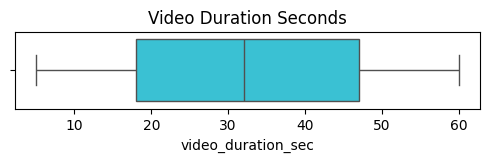

In [57]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['video_duration_sec'], color="#20D5EC")
plt.title('Video Duration Seconds');

***Insights***

* The distribution is relatively even, with a median of 32 seconds and an IQR ranging from 18 to 47 seconds
* No data points beyond the whiskers, indicating that there are no outliers

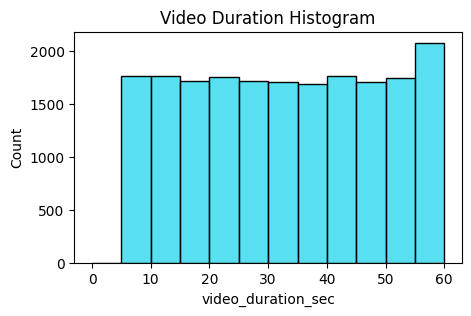

In [56]:
# Create a histogram to further explore the distribution of `video_duration_sec`
plt.figure(figsize=(5,3))
sns.histplot(df['video_duration_sec'], bins=range(0,61,5), color="#20D5EC")
plt.title('Video Duration Histogram');

***Insight***

* All videos range from 5 to 60 seconds in length, with a generally uniform distribution, except for a slight increase in the 55-60 seconds range.

<br>

***Video View Count:***

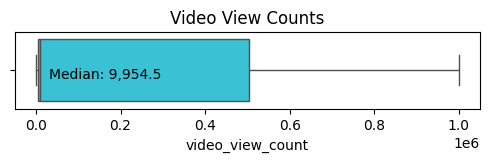

In [55]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6, 1))
sns.boxplot(x=df['video_view_count'], color="#20D5EC")

# Annotate median value to be sure of boxplot values corresponding with descriptive stats
median_value = df['video_view_count'].median()

plt.annotate(f'Median: {median_value:,}', 
             xy=(median_value, 0), 
             xytext=(median_value + 20000, 0.1),
             ha='left')

plt.title('Video View Counts');

***Insights***

* IQR ranges between roughly 5,000 and 500,000
* Half of the videos have view counts below 10,000

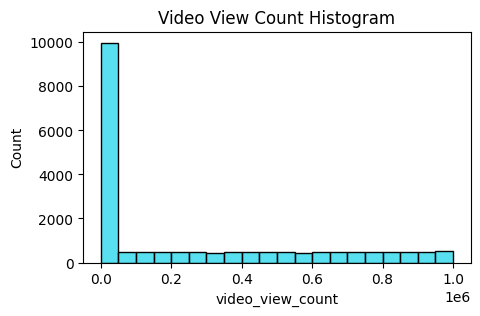

In [54]:
# Create a histogram to further explore the distribution of `video_view_count`
plt.figure(figsize=(5,3))
hist = sns.histplot(df['video_view_count'], bins=range(0,1000001,50000), color="#20D5EC")
plt.title('Video View Count Histogram');

***Insights***

* With the data is separated into 50,000 view intervals, the distribution is relatively even across intervals above 50,000 views
* A significant concentration is observed in the first bin, reflecting the fact that the median view count is below 10,000

<br>

***Video Like Count:***

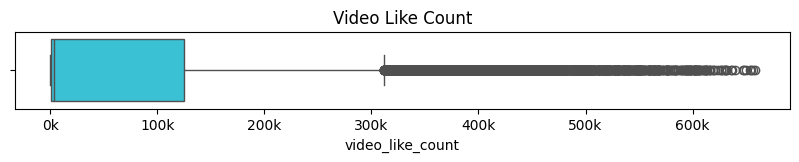

In [53]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['video_like_count'], color="#20D5EC")

plt.xticks(ticks=range(0, 660000, 100000), labels=[f'{x//1000}k' for x in range(0, 660000, 100000)])

plt.title('Video Like Count');

***Insight***

* The significant presence of densely packed outliers beyond the upper whisker suggests that while most videos have relatively low like counts, a smaller number have exceptionally high like counts, creating a skewed distribution.

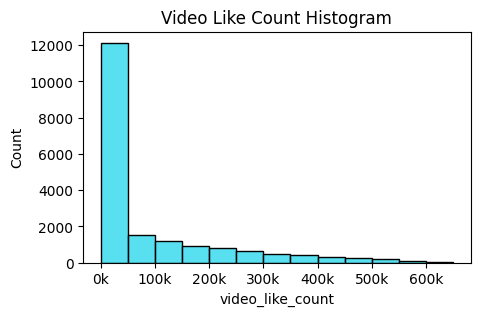

In [52]:
# Create a histogram to further explore the distribution of `video_like_count`
plt.figure(figsize=(5,3))
sns.histplot(df['video_like_count'], bins=range(0, 660000, 50000), color="#20D5EC")

plt.xticks(ticks=range(0, 660000, 100000), labels=[f'{x//1000}k' for x in range(0, 660000, 100000)])

plt.title('Video Like Count Histogram');

***Insight***

* Similar to the view count distribution, there is a significant concentration in the first 50,000 like count bin, followed by a sharp drop and a gradual tapering off

<br>

***Video Share Count:***

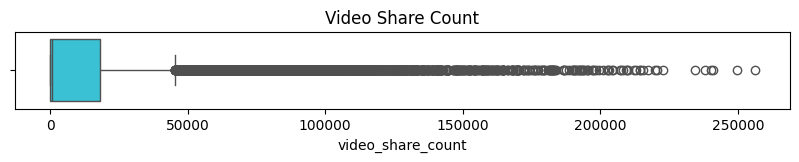

In [51]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['video_share_count'], color="#20D5EC")
plt.title('Video Share Count');

***Insights***

* IQR range of 115-18,222
* Significant presence of outliers beyond upper fence (45,382.5)

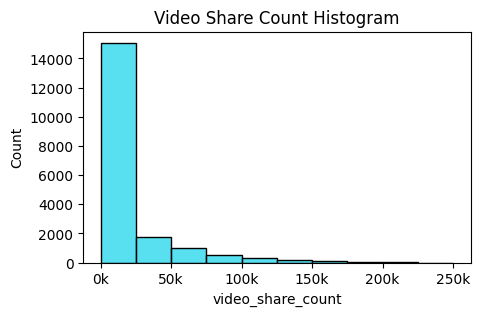

In [50]:
# Create a histogram to further explore the distribution of `video_share_count`
plt.figure(figsize=(5,3))
sns.histplot(df['video_share_count'], bins=range(0, 260001, 25000), color="#20D5EC")

plt.xticks(ticks=range(0, 260001, 50000), labels=[f'{x//1000}k' for x in range(0, 260001, 50000)])

plt.title('Video Share Count Histogram');

***Insight***

* There is a high concentration of counts within the first 25,000 share count bin, followed by a sharp decline and a gradual tapering off

<br>

***Video Download Count:***

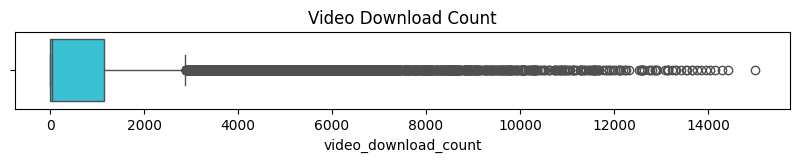

In [49]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['video_download_count'], color="#20D5EC")
plt.title('Video Download Count');

***Insights***

* The IQR ranges from 7 to 1,156, with a median of 46 downloads
* With the upper fence at 2,880.125, the presence of outliers is evident

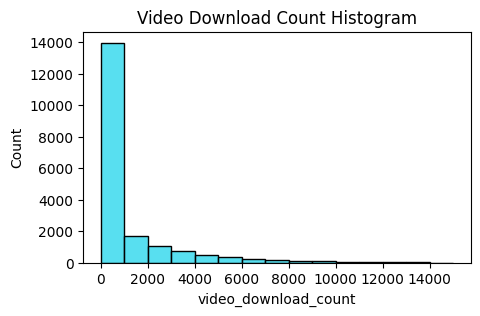

In [48]:
# Create a histogram to further explore the distribution of `video_download_count`
plt.figure(figsize=(5,3))
sns.histplot(df['video_download_count'], bins=range(0, 15001, 1000), color="#20D5EC")
plt.title('Video Download Count Histogram');

***Insight***

* High concentration of counts within the first 1,000 download count bin, followed by a sharp decline and a gradual tapering off

<br>

***Video Comment Count:***

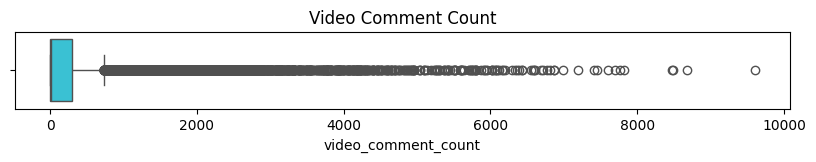

In [47]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(10, 1))
sns.boxplot(x=df['video_comment_count'], color="#20D5EC")
plt.title('Video Comment Count');

***Insights***

* IQR ranges from 1-292 comments, with a median of 9 comments
* A significant number of outliers present beyond the upper whisker

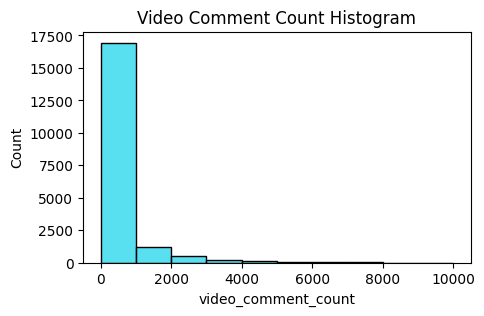

In [46]:
# Create a histogram to further explore the distribution of `video_comment_count`
plt.figure(figsize=(5,3))
sns.histplot(df['video_comment_count'], bins=range(0, 10001, 1000), color="#20D5EC")

plt.title('Video Comment Count Histogram');

***Insight***

* Again, the distribution shows a significant concentration in the first 500 comment count bin, followed by a sharp decline and gradual tapering off. With a median of 9, this is unsurprising

<br>

***Claim by Verification Status:***

claim_status  verified_status
claim         not verified       9399
              verified            209
opinion       not verified       8485
              verified            991
Name: count, dtype: int64


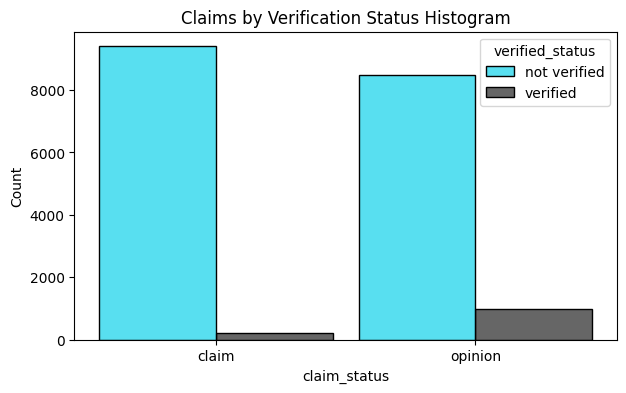

In [61]:
# When using 1-2 colours, on-brand colours are visually accessible and acceptable

print(df.groupby('claim_status')['verified_status'].value_counts())

plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9,
             palette=['#20D5EC', '#333333'])
plt.title('Claims by Verification Status Histogram');

***Insights***

* The number of unverified users significantly exceeds the number of verified users
* Verified users are more likely to post opinions than claims

<br>

***Claim Status by Author Ban Status:***

claim_status  author_ban_status
claim         active               6566
              under review         1603
              banned               1439
opinion       active               8817
              under review          463
              banned                196
Name: count, dtype: int64


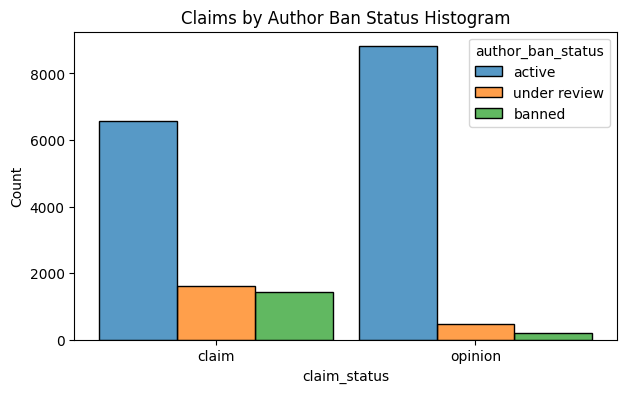

In [63]:
# All three on-brand colours are not aligned with accessibility requirements
# Opting for visually impaired-friendly colours in visualizations when using three or more colours

print(df.groupby('claim_status')['author_ban_status'].value_counts())

plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='claim_status',
             hue='author_ban_status',
             hue_order=['active', 'under review', 'banned'],
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by Author Ban Status Histogram');

***Insights***

* Across both claim statuses, active authors are the clear majority, with active user opinions being the most prevalent
* However, there are significantly more claims made by under-review and banned authors, suggesting stricter moderation for claims

<br>

***Median View Counts by Author Ban Status:***

author_ban_status
active            8616.0
banned          448201.0
under review    365245.5
Name: video_view_count, dtype: float64


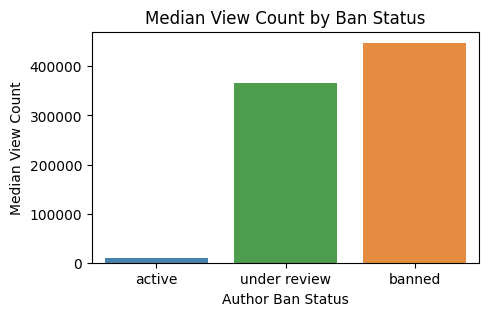

In [83]:
print(df.groupby('author_ban_status')['video_view_count'].median())

median_ban_status = df.groupby(['author_ban_status'], as_index=False).median(numeric_only=True)

fig = plt.figure(figsize=(5,3))
sns.barplot(data=median_ban_status,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            hue='author_ban_status',
            dodge=False,
            alpha=0.9)
plt.title('Median View Count by Ban Status')
plt.ylabel('Median View Count')
plt.xlabel('Author Ban Status');